<a href="https://colab.research.google.com/github/EPRADDH/NLP_Natural_Language_Processing_Methods/blob/main/Cosine_Similarity_N_String_Matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Some of the popular similarity measures are –

Euclidean Distance.

Manhattan Distance.

Jaccard Similarity.

Minkowski Distance.

Cosine Similarity.

# Cosine Similarity

Cosine Similarity is a measurement that quantifies the similarity between two or more vectors

The cosine similarity is the cosine of the angle between vectors

Suppose the angle between the two vectors was 90 degrees. In that case, the cosine similarity will have a value of 0; this means that the two vectors are orthogonal or perpendicular to each other.

As the cosine similarity measurement gets closer to 1, then the angle between the two vectors A and B is smaller.


The cosine similarity is described mathematically as the division between the dot product of vectors and the product of the euclidean norms or magnitude of each vector


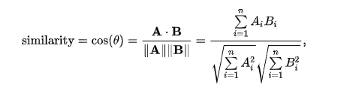

Here’s an example:

Document 1: Deep Learning can be hard
Document 2: Deep Learning can be simple

## Step 1: 

First we obtain a vectorised representation of the texts
Image for post

Document 1: [1, 1, 1, 1, 1, 0] let’s refer to this as A

Document 2: [1, 1, 1, 1, 0, 1] let’s refer to this as B

Above we have two vectors (A and B) that are in a 6 dimension vector space

## Step 2: 

Find the cosine similarity

cosine similarity (CS) = (A . B) / (||A|| ||B||)

Calculate the dot product between A and B: 1.1 + 1.1 + 1.1 + 1.1 + 1.0 + 0.1 = 4

Calculate the magnitude of the vector A: √1² + 1² + 1² + 1² + 1² + 0² = 2.2360679775

Calculate the magnitude of the vector B: √1² + 1² + 1² + 1² + 0²+ 1² = 2.2360679775

Calculate the cosine similarity: (4) / (2.2360679775*2.2360679775) = 0.80 (80% similarity between the sentences in both document)

In [ ]:
import math
from collections import Counter
def get_cosine(vec1, vec2):
    common = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in common])

    sum1 = sum([vec1[x]**2 for x in vec1.keys()]) 
    sum2 = sum([vec2[x]**2 for x in vec2.keys()]) 
    denominator = math.sqrt(sum1) * math.sqrt(sum2)
   
    if not denominator:
        return 0.0 
    else:
        return float(numerator) / denominator

def text_to_vector(text): 
    words = text.split() 
    return Counter(words)

text1 = 'This is an article on analytics vidhya' 
text2 = 'article on analytics vidhya is about natural language processing'

vector1 = text_to_vector(text1) 
vector2 = text_to_vector(text2) 
cosine = get_cosine(vector1, vector2)

In [ ]:
cosine

0.629940788348712

#Practice Using Scikit-learn (sklearn)

In [ ]:
documents = (
"The sky is blue",
"The sun is bright",
"The sun in the sky is bright",
"We can see the shining sun, the bright sun"
)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
print (tfidf_matrix.shape)


(4, 11)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(tfidf_matrix[0:1], tfidf_matrix)

array([[1.        , 0.36651513, 0.52305744, 0.13448867]])

In [ ]:
import math
# This was already calculated on the previous step, so we just use the value
cos_sim = 0.52305744
angle_in_radians = math.acos(cos_sim)
print (math.degrees(angle_in_radians))

58.462437107432784


#The Jaccard Similarity algorithm

Cosine similarity is for comparing two real-valued vectors, but Jaccard similarity is for comparing two binary vectors (sets).

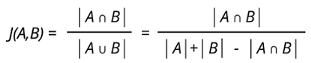






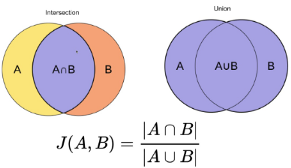


Jaccard similarity divides the size of the intersection by the size of the union of the sample sets

Both Cosine similarity and Jaccard similarity are common metrics for calculating text similarity. Calculating the Jaccard similarity is computationally more expensive as it matches all the terms of one document to another document. The Jaccard similarity turns out to be useful by detecting duplicates.




In [ ]:
from sklearn.metrics import jaccard_score
A = [1, 1, 1, 0]
B = [1, 1, 0, 1]
jacc = jaccard_score(A,B)
print("Jaccard similarity: %.3f" % (jacc))

Jaccard similarity: 0.500


#The Pearson Similarity algorithm

The Pearson correlation coefficient measures the linear relationship
 between two datasets. Strictly speaking, Pearson's correlation requires
 that each dataset be normally distributed. Like other correlation
 coefficients, this one varies between -1 and +1 with 0 implying no
 correlation. Correlations of -1 or +1 imply an exact linear
 relationship. Positive correlations imply that as x increases, so does
 y. Negative correlations imply that as x increases, y decreases.

In [ ]:
#seed random number generator
import numpy as np
np.random.seed(42)
# prepare data
x = np.random.randn(15)
y = x + np.random.randn(15)

In [ ]:
from pydoc import help
from scipy.stats.stats import pearsonr
help(pearsonr)


Help on function pearsonr in module scipy.stats.stats:

pearsonr(x, y)
    Pearson correlation coefficient and p-value for testing non-correlation.
    
    The Pearson correlation coefficient [1]_ measures the linear relationship
    between two datasets.  The calculation of the p-value relies on the
    assumption that each dataset is normally distributed.  (See Kowalski [3]_
    for a discussion of the effects of non-normality of the input on the
    distribution of the correlation coefficient.)  Like other correlation
    coefficients, this one varies between -1 and +1 with 0 implying no
    correlation. Correlations of -1 or +1 imply an exact linear relationship.
    Positive correlations imply that as x increases, so does y. Negative
    correlations imply that as x increases, y decreases.
    
    The p-value roughly indicates the probability of an uncorrelated system
    producing datasets that have a Pearson correlation at least as extreme
    as the one computed from these da

In [ ]:

# calculate Pearson's correlation
corr, _ = pearsonr(x, y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.810
